# Encoder And Decoder Model

## 1. 作业回顾
## 2. Encoder Decoder串讲 训练演示 (tensorflow 2.0)
## 3. 对联生成Demo实践 (tensorflow 2.0)
## 4. 问题解答

![](https://tensorflow.google.cn/images/seq2seq/attention_mechanism.jpg)

# 作业回顾
1. vocab 构建         - 预处理
2. 切词               - 预处理 
3. gensim训练词向量,保存词向量矩阵  - 模型
4. encoder - decoder实现         - 模型

![](https://github.com/tensorflow/nmt/blob/master/nmt/g3doc/img/attention_equation_0.jpg)

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'# gpu报错 使用cpu运行
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

In [2]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import sys
# 要导入代码的路径 ,utils无法导入的同学,添加上自己code的路径 ,项目代码结构 code/utils ....
sys.path.append('/root/xuchunwei/practice/NLP/课件及代码/lecture_4_2/code')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from utils.data_loader import build_dataset,load_dataset
from utils.wv_loader import load_embedding_matrix,load_vocab
from utils.config import *
from gensim.models.word2vec import LineSentence, Word2Vec
import tensorflow as tf
from model_layers import seq2seq_model
import time

Building prefix dict from the default dictionary ...
2019-12-03 18:54:42,185 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
2019-12-03 18:54:42,186 : DEBUG : Loading model from cache /tmp/jieba.cache
Loading model cost 0.545 seconds.
2019-12-03 18:54:42,731 : DEBUG : Loading model cost 0.545 seconds.
Prefix dict has been built succesfully.
2019-12-03 18:54:42,732 : DEBUG : Prefix dict has been built succesfully.


In [4]:
tf.__version__

'2.0.0'

# 0. 预处理数据

In [5]:
build_dataset(train_data_path,test_data_path)

train data size 82943,test data size 20000
train data size 82871,test data size 20000,merged_df data size 102871


2019-12-03 18:57:19,753 : INFO : collecting all words and their counts
2019-12-03 18:57:19,754 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-03 18:57:19,920 : INFO : PROGRESS: at sentence #10000, processed 797722 words, keeping 36384 word types


start build w2v model


2019-12-03 18:57:20,091 : INFO : PROGRESS: at sentence #20000, processed 1606523 words, keeping 53659 word types
2019-12-03 18:57:20,256 : INFO : PROGRESS: at sentence #30000, processed 2404794 words, keeping 66425 word types
2019-12-03 18:57:20,418 : INFO : PROGRESS: at sentence #40000, processed 3177595 words, keeping 77323 word types
2019-12-03 18:57:20,591 : INFO : PROGRESS: at sentence #50000, processed 3999190 words, keeping 87172 word types
2019-12-03 18:57:20,773 : INFO : PROGRESS: at sentence #60000, processed 4876510 words, keeping 97102 word types
2019-12-03 18:57:20,960 : INFO : PROGRESS: at sentence #70000, processed 5777057 words, keeping 106674 word types
2019-12-03 18:57:21,127 : INFO : PROGRESS: at sentence #80000, processed 6578738 words, keeping 114776 word types
2019-12-03 18:57:21,282 : INFO : PROGRESS: at sentence #90000, processed 7311914 words, keeping 122690 word types
2019-12-03 18:57:21,436 : INFO : PROGRESS: at sentence #100000, processed 8038510 words, keep

start retrain w2v model


2019-12-03 18:57:36,668 : INFO : PROGRESS: at sentence #20000, processed 4400000 words, keeping 27236 word types
2019-12-03 18:57:37,031 : INFO : PROGRESS: at sentence #30000, processed 6600000 words, keeping 29624 word types
2019-12-03 18:57:37,397 : INFO : PROGRESS: at sentence #40000, processed 8800000 words, keeping 30882 word types
2019-12-03 18:57:37,756 : INFO : PROGRESS: at sentence #50000, processed 11000000 words, keeping 31578 word types
2019-12-03 18:57:38,122 : INFO : PROGRESS: at sentence #60000, processed 13200000 words, keeping 32031 word types
2019-12-03 18:57:38,492 : INFO : PROGRESS: at sentence #70000, processed 15400000 words, keeping 32287 word types
2019-12-03 18:57:38,863 : INFO : PROGRESS: at sentence #80000, processed 17600000 words, keeping 32389 word types
2019-12-03 18:57:38,967 : INFO : collected 32415 word types from a corpus of 18231620 raw words and 82871 sentences
2019-12-03 18:57:38,968 : INFO : Updating model with new vocabulary
2019-12-03 18:57:38,9

1/3


2019-12-03 18:57:47,620 : INFO : PROGRESS: at sentence #40000, processed 1120000 words, keeping 13545 word types
2019-12-03 18:57:47,680 : INFO : PROGRESS: at sentence #50000, processed 1400000 words, keeping 14722 word types
2019-12-03 18:57:47,739 : INFO : PROGRESS: at sentence #60000, processed 1680000 words, keeping 15832 word types
2019-12-03 18:57:47,799 : INFO : PROGRESS: at sentence #70000, processed 1960000 words, keeping 16920 word types
2019-12-03 18:57:47,858 : INFO : PROGRESS: at sentence #80000, processed 2240000 words, keeping 17677 word types
2019-12-03 18:57:47,875 : INFO : collected 17908 word types from a corpus of 2320388 raw words and 82871 sentences
2019-12-03 18:57:47,875 : INFO : Updating model with new vocabulary
2019-12-03 18:57:47,885 : INFO : New added 6819 unique words (27% of original 24727) and increased the count of 6819 pre-existing words (27% of original 24727)
2019-12-03 18:57:47,916 : INFO : deleting the raw counts dictionary of 17908 items
2019-12-0

2/3


2019-12-03 18:57:49,713 : INFO : PROGRESS: at sentence #10000, processed 2200000 words, keeping 22375 word types
2019-12-03 18:57:50,073 : INFO : collected 26990 word types from a corpus of 4400000 raw words and 20000 sentences
2019-12-03 18:57:50,074 : INFO : Updating model with new vocabulary
2019-12-03 18:57:50,089 : INFO : New added 12179 unique words (31% of original 39169) and increased the count of 12179 pre-existing words (31% of original 39169)
2019-12-03 18:57:50,144 : INFO : deleting the raw counts dictionary of 26990 items
2019-12-03 18:57:50,144 : INFO : sample=0.001 downsamples 16 most-common words
2019-12-03 18:57:50,145 : INFO : downsampling leaves estimated 2905440 word corpus (66.5% of prior 4369056)
2019-12-03 18:57:50,186 : INFO : estimated required memory for 24358 words and 300 dimensions: 70638200 bytes
2019-12-03 18:57:50,186 : INFO : updating layer weights
2019-12-03 18:57:50,211 : WARNING : Effective 'alpha' higher than previous training cycles
2019-12-03 18:5

finish retrain w2v model
final w2v_model has vocabulary of  32536


(array([[32532,   337,   874, ..., 32535, 32535, 32535],
        [32532,   689, 32533, ..., 32535, 32535, 32535],
        [32532,  1316,    64, ...,  4905,    53, 32534],
        ...,
        [32532,   168,   837, ..., 32535, 32535, 32535],
        [32532, 12524,  2905, ..., 32535, 32535, 32535],
        [32532,  2547,    48, ..., 32535, 32535, 32535]]),
 array([[32532,   262, 32534, ..., 32535, 32535, 32535],
        [32532,   262, 32534, ..., 32535, 32535, 32535],
        [32532,    53,   401, ..., 32535, 32535, 32535],
        ...,
        [32532,     9,    26, ..., 32535, 32535, 32535],
        [32532,     9,     4, ..., 32535, 32535, 32535],
        [32532,     9,   102, ..., 32535, 32535, 32535]]),
 array([[32532,   933,   217, ..., 32535, 32535, 32535],
        [32532,   175,    81, ..., 32535, 32535, 32535],
        [32532,   933,  5909, ..., 32535, 32535, 32535],
        ...,
        [32532,    44,   105, ..., 32535, 32535, 32535],
        [32532,    74,  3702, ..., 32535, 325

# 1. 加载数据

## 1.1 加载数据集

In [6]:
train_X,train_Y,test_X = load_dataset()

## 1.2. 加载vocab

In [7]:
vocab,reverse_vocab=load_vocab(vocab_path)

## 1.3 加载预训练权重

In [8]:
embedding_matrix=load_embedding_matrix()

In [9]:
# 输入的长度  train_X.shape -> (82871, 261)
input_length = train_X.shape[1]
# 输出的长度  train_Y.shape -> (82871, 34)
output_sequence_length = train_Y.shape[1]
# 词表大小
vocab_size=len(vocab)

# 2. 模型训练

## Write the encoder and decoder model

Implement an encoder-decoder model with attention which you can read about in the TensorFlow [Neural Machine Translation (seq2seq) tutorial](https://github.com/tensorflow/nmt). This example uses a more recent set of APIs. This notebook implements the [attention equations](https://github.com/tensorflow/nmt#background-on-the-attention-mechanism) from the seq2seq tutorial. The following diagram shows that each input words is assigned a weight by the attention mechanism which is then used by the decoder to predict the next word in the sentence. The below picture and formulas are an example of attention mechanism from [Luong's paper](https://arxiv.org/abs/1508.04025v5). 

<img src="data/img/attention_mechanism.jpg" width="500" alt="attention mechanism">

The input is put through an encoder model which gives us the encoder output of shape *(batch_size, max_length, hidden_size)* and the encoder hidden state of shape *(batch_size, hidden_size)*.

Here are the equations that are implemented:

<img src="data/img/attention_equation_0.jpg" alt="attention equation 0" width="800">
<img src="data/img/attention_equation_1.jpg" alt="attention equation 1" width="800">

This tutorial uses [Bahdanau attention](https://arxiv.org/pdf/1409.0473.pdf) for the encoder. Let's decide on notation before writing the simplified form:

* FC = Fully connected (dense) layer
* EO = Encoder output
* H = hidden state
* X = input to the decoder

And the pseudo-code:

* `score = FC(tanh(FC(EO) + FC(H)))`
* `attention weights = softmax(score, axis = 1)`. Softmax by default is applied on the last axis but here we want to apply it on the *1st axis*, since the shape of score is *(batch_size, max_length, hidden_size)*. `Max_length` is the length of our input. Since we are trying to assign a weight to each input, softmax should be applied on that axis.
* `context vector = sum(attention weights * EO, axis = 1)`. Same reason as above for choosing axis as 1.
* `embedding output` = The input to the decoder X is passed through an embedding layer.
* `merged vector = concat(embedding output, context vector)`
* This merged vector is then given to the GRU

The shapes of all the vectors at each step have been specified in the comments in the code:

FC=全连接层，EO=编码器输出，H=隐藏层状态，X=解码器输入，模型计算过程如下表示：

+ score = FC(tanh(FC(EO) + FC(H)))
+ attention weights = softmax(score, axis = 1)
+ context vector = sum(attention weights * EO, axis = 1)
+ embedding output=解码器输入X，输入词嵌入层
+ merged vector=concat(embedding output, context vector)
+ 将merged vector输入到GRU

## 2.1 基本参数设置

In [10]:
# # 取部分数据进行训练
sample_num=640
train_X=train_X[:sample_num]
train_Y=train_Y[:sample_num]

In [11]:
# 训练集的长度
BUFFER_SIZE = len(train_X)

# 输入的长度
max_length_inp=train_X.shape[1]
# 输出的长度
max_length_targ=train_Y.shape[1]

BATCH_SIZE = 64

# 训练一轮需要迭代多少步
steps_per_epoch = len(train_X)//BATCH_SIZE

# 词向量维度
embedding_dim = 300
# 隐藏层单元数
units = 1024

# 词表大小
vocab_size = len(vocab)

# 构建训练集
dataset = tf.data.Dataset.from_tensor_slices((train_X, train_Y)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

## 2.2 构建Encoder

In [12]:
train_X

array([[32532.,   337.,   874., ..., 32535., 32535., 32535.],
       [32532.,   689., 32533., ..., 32535., 32535., 32535.],
       [32532.,  1316.,    64., ...,  4905.,    53., 32534.],
       ...,
       [32532.,  3465.,  4316., ..., 32535., 32535., 32535.],
       [32532.,  3465., 32533., ..., 32535., 32535., 32535.],
       [32532.,   207.,  1240., ..., 32535., 32535., 32535.]])

![](https://dataxujing.github.io/seq2seqlearn/img/tf1.png)

In [13]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim ,embedding_matrix , enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim,weights=[embedding_matrix],trainable=False)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

## 测试Encode

In [14]:
encoder = Encoder(vocab_size, embedding_dim,embedding_matrix, units, BATCH_SIZE)
# example_input
example_input_batch = tf.ones(shape=(BATCH_SIZE,max_length_inp), dtype=tf.int32)
# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 220, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


## 2.3 构建Attention

![](https://upload-images.jianshu.io/upload_images/244848-464154d2a8369253.png?imageMogr2/auto-orient/strip|imageView2/2/w/934/format/webp)

In [15]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        
        # query为上次的GRU隐藏层
        # values为编码器的编码结果enc_output
        # 在seq2seq模型中，St是后面的query向量，而编码过程的隐藏状态hi是values。
        hidden_with_time_axis = tf.expand_dims(query, 1)

        
        # 计算注意力权重值
        score = self.V(tf.nn.tanh(
            self.W1(values) + self.W2(hidden_with_time_axis)))

        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # # 使用注意力权重*编码器输出作为返回值，将来会作为解码器的输入
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

给定一组向量集合values，以及查询向量query，我们根据query向量去计算values加权和，即成为attention机制。

attention的重点即为求这个集合values中每个value的权值。

## 测试Attention

In [16]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 220, 1)


## 2.4 构建Decoder

![](https://tensorflow.google.cn/images/seq2seq/attention_mechanism.jpg)

In [17]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim,embedding_matrix, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim,weights=[embedding_matrix],trainable=False)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)

        # used for attention
        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, hidden, enc_output):
        # 使用上次的隐藏层（第一次使用编码器隐藏层）、编码器输出计算注意力权重
        # enc_output shape == (batch_size, max_length, hidden_size)
        context_vector, attention_weights = self.attention(hidden, enc_output)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)
        
        # 将上一循环的预测结果跟注意力权重值结合在一起作为本次的GRU网络输入
        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))

        # output shape == (batch_size, vocab)
        x = self.fc(output)

        return x, state, attention_weights

## 测试Decoder

In [18]:
decoder = Decoder(vocab_size, embedding_dim,embedding_matrix, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((64, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 32536)


## 2.5 定义优化函数

In [19]:
# optimizer = tf.keras.optimizers.Adam()
# loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

# def loss_function(real, pred):
#     mask = tf.math.logical_not(tf.math.equal(real, 0))
#     loss_ = loss_object(real, pred)

#     mask = tf.cast(mask, dtype=loss_.dtype)
#     loss_ *= mask

#     return tf.reduce_mean(loss_)

In [20]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

pad_index=vocab['<PAD>']

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, pad_index))
    
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

## 2.6 保存点设置

In [21]:
checkpoint_dir = 'data/checkpoints/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [22]:
checkpoint_prefix

'data/checkpoints/training_checkpoints/ckpt'

# 3. 训练

## Training

1. Pass the *input* through the *encoder* which return *encoder output* and the *encoder hidden state*.
2. The encoder output, encoder hidden state and the decoder input (which is the *start token*) is passed to the decoder.
3. The decoder returns the *predictions* and the *decoder hidden state*.
4. The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.
5. Use *teacher forcing* to decide the next input to the decoder.
6. *Teacher forcing* is the technique where the *target word* is passed as the *next input* to the decoder.
7. The final step is to calculate the gradients and apply it to the optimizer and backpropagate.

![](https://tensorflow.google.cn/images/seq2seq/attention_mechanism.jpg)

In [23]:
@tf.function
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        # 1. 构建encoder
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        # 2. 复制
        dec_hidden = enc_hidden
        # 3. <START> * BATCH_SIZE 
        dec_input = tf.expand_dims([vocab['<START>']] * BATCH_SIZE, 1)

        # Teacher forcing - feeding the target as the next input
        for t in range(1, targ.shape[1]):
            # decoder(x, hidden, enc_output)
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
            
            loss += loss_function(targ[:, t], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(targ[:, t], 1)

        batch_loss = (loss / int(targ.shape[1]))

        variables = encoder.trainable_variables + decoder.trainable_variables

        gradients = tape.gradient(loss, variables)

        optimizer.apply_gradients(zip(gradients, variables))

        return batch_loss

-  **encoder_inputs** [max_encoder_time, batch_size]: source input words.
-  **decoder_inputs** [max_decoder_time, batch_size]: target input words.
-  **decoder_outputs** [max_decoder_time, batch_size]: target output words,
   these are decoder_inputs shifted to the left by one time step with an
   end-of-sentence tag appended on the right.

![](https://github.com/tensorflow/nmt/raw/master/nmt/g3doc/img/seq2seq.jpg)

In [24]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()
    
    # 初始化隐藏层
    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        # 
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

        if batch % 1 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

2019-12-03 18:59:32,835 : WARNING : Layer encoder is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2019-12-03 18:59:33,509 : WARNING : Layer decoder is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer i

Epoch 1 Batch 0 Loss 4.6615
Epoch 1 Batch 1 Loss 4.5954
Epoch 1 Batch 2 Loss 3.9178
Epoch 1 Batch 3 Loss 3.8358
Epoch 1 Batch 4 Loss 3.7431
Epoch 1 Batch 5 Loss 2.8023
Epoch 1 Batch 6 Loss 2.9458
Epoch 1 Batch 7 Loss 2.9501
Epoch 1 Batch 8 Loss 2.3663
Epoch 1 Batch 9 Loss 3.5425
Epoch 1 Loss 3.5361
Time taken for 1 epoch 259.58641147613525 sec

Epoch 2 Batch 0 Loss 2.4641
Epoch 2 Batch 1 Loss 3.2040
Epoch 2 Batch 2 Loss 2.9349
Epoch 2 Batch 3 Loss 2.5312
Epoch 2 Batch 4 Loss 2.3001
Epoch 2 Batch 5 Loss 2.9895
Epoch 2 Batch 6 Loss 3.0809
Epoch 2 Batch 7 Loss 2.8691
Epoch 2 Batch 8 Loss 2.4424
Epoch 2 Batch 9 Loss 2.3854
Epoch 2 Loss 2.7202
Time taken for 1 epoch 230.01315188407898 sec

Epoch 3 Batch 0 Loss 2.3844
Epoch 3 Batch 1 Loss 2.5169
Epoch 3 Batch 2 Loss 2.6382
Epoch 3 Batch 3 Loss 2.4676
Epoch 3 Batch 4 Loss 2.9482
Epoch 3 Batch 5 Loss 2.3856
Epoch 3 Batch 6 Loss 2.8313
Epoch 3 Batch 7 Loss 2.6983
Epoch 3 Batch 8 Loss 2.4974
Epoch 3 Batch 9 Loss 2.7333
Epoch 3 Loss 2.6101
Time t

## Translate

* The evaluate function is similar to the training loop, except we don't use *teacher forcing* here. The input to the decoder at each time step is its previous predictions along with the hidden state and the encoder output.
* Stop predicting when the model predicts the *end token*.
* And store the *attention weights for every time step*.

Note: The encoder output is calculated only once for one input.

In [25]:
from utils.data_loader import preprocess_sentence
import matplotlib
from matplotlib import font_manager
# 解决中文乱码
font=font_manager.FontProperties(fname="data/TrueType/simhei.ttf")
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [26]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp+2))

    inputs = preprocess_sentence(sentence,max_length_inp,vocab)

    inputs = tf.convert_to_tensor(inputs)

    result = ''
    
    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    
    dec_input = tf.expand_dims([vocab['<START>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)
        
        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        
        attention_plot[t] = attention_weights.numpy()
        predicted_id = tf.argmax(predictions[0]).numpy()

        result += reverse_vocab[predicted_id] + ' '
        if reverse_vocab[predicted_id] == '<STOP>':
            return result, sentence, attention_plot

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [27]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14,'fontproperties':font}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [28]:
def translate(sentence):
    result, sentence, attention_plot = evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

## Restore the latest checkpoint and test

In [2]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

NameError: name 'checkpoint' is not defined

In [29]:
sentence='漏机油 具体 部位 发动机 变速器 正中间 位置 拍 中间 上面 上 已经 看见'

Input: 漏机油 具体 部位 发动机 变速器 正中间 位置 拍 中间 上面 上 已经 看见
Predicted translation: 情况 <STOP> 


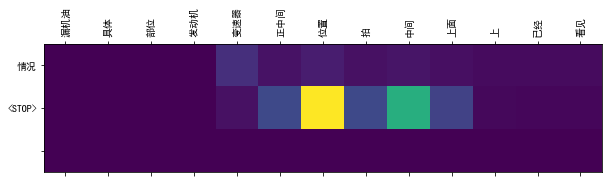

In [30]:
translate(sentence)

## Next steps

* [Download a different dataset](http://www.manythings.org/anki/) to experiment with translations, for example, English to German, or English to French.
* Experiment with training on a larger dataset, or using more epochs
* [Neural Machine Translation (seq2seq) Tutorial](https://github.com/tensorflow/nmt)
